In [1]:
# Install the packages 
!pip install soundfile

!pip install pipwin
!pipwin install pyaudio

!pip install numpy

!pip install librosa

!pip install tensorflow 

!pip install scikit-learn

     |████████████████████████████████| 128 kB 21.7 MB/s 
     |████████████████████████████████| 1.0 MB 42.6 MB/s 
  Created wheel for pipwin: filename=pipwin-0.5.2-py2.py3-none-any.whl size=8791 sha256=b0c4aef9482286ea9c21e1ba9932fead64c93e22731ce25971839a7be22f78dd
  Stored in directory: /root/.cache/pip/wheels/07/df/15/51b9c5d152e27b7fad998993eba50e15dfa709cc7438557f7e
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=26000 sha256=ad4534e14db3eea920c853111e9f9ea149025513dee290d0a0dedebcfecd23c3
  Stored in directory: /root/.cache/pip/wheels/2a/80/ac/dcd2bdbd03dd2b7b7e2bf3e5afbda6a1ab7935bbce314969da
Successfully built pipwin pyjsparser
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
/usr/local/lib/python3.7/dist-packages/pipwin/command.py:66: UserWarning: Found a non Windows system. Package installation might not work.

In [2]:
# Import some of the necessary libraries 

import soundfile

import librosa
from librosa import display

import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

In [3]:
from google.colab import drive
import os

# This is the directory where the audio files will be placed.

if not os.path.exists('Audio_RAVNESS/'):
  audio_dir = 'Audio_RAVNESS/'
  drive.mount('DriveContent')
  file_existance = os.makedirs('Audio_RAVNESS/', exist_ok = True)
else:
    print ('Audio file already exists')

!unzip 'DriveContent/MyDrive/Audio_RAVNESS.zip' -d 'Audio_RAVNESS/'

Mounted at DriveContent
Archive:  DriveContent/MyDrive/Audio_RAVNESS.zip
   creating: Audio_RAVNESS/Actor_01/
  inflating: Audio_RAVNESS/Actor_01/03-02-01-01-01-01-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-01-01-02-02-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-01-01-01-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-01-01-02-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-01-02-01-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-01-02-02-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-02-01-01-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-02-01-02-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-02-02-01-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-02-02-02-02-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-03-01-01-01-01.wav  
  inflating: Audio_RAVNESS/Actor_01/03-02-03-01-01-02-01.wav  
  inflat

In [62]:
# Emotions available of RAVNESS Database
emotions = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
}

# Emotions for training
emotions_training = {
    "happy",
    "sad",
    "angry",
    "fear",
}

In [5]:
# Function used to extract the characteristics from audio signal

def extract_characteristics(file_name, **kwargs):

    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")

    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])

        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))

        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
                        
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
 
    return result

In [63]:
from sklearn.model_selection import train_test_split
import glob

# Function used to load the training and test parameters of the model
def load_data(test_size):
    X = []
    Y = []
   
    try :
      for file in glob.glob(audio_dir+'Actor_*/*.wav'):
          
          # get the base name of the audio file
          audio_name = os.path.basename(file)
          print(audio_name)
          print(audio_name[2])
          # get the emotion label
          emotion = emotions[audio_name.split("-")[2]]
          
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in emotions_training:
              continue
          
          # extract speech features
          features = extract_characteristics(file, mfcc=True, chroma=True, mel=True)
          
          # add to data
          X.append(features)
          l={'happy': 0.0,'sad':1.0,'angry':2.0,'fear':3.0}
          Y.append(l[emotion])
    except :
         pass

    # split the data to training and testing and return it
    return train_test_split(np.array(X), Y, test_size=test_size, random_state=7)

In [64]:
X_train, X_test, Y_train, Y_test = load_data(test_size=0.30)

03-02-06-02-01-02-24.wav
-
03-02-05-01-01-02-24.wav
-
03-02-04-01-02-01-24.wav
-
03-02-01-01-02-01-24.wav
-
03-02-03-01-01-01-24.wav
-
03-02-04-01-01-02-24.wav
-
03-02-05-01-02-02-24.wav
-
03-02-05-02-02-02-24.wav
-
03-02-06-01-02-02-24.wav
-
03-02-06-02-01-01-24.wav
-
03-02-01-01-02-02-24.wav
-
03-02-02-02-02-02-24.wav
-
03-02-02-01-02-01-24.wav
-
03-02-03-01-02-01-24.wav
-
03-02-04-02-02-01-24.wav
-
03-02-02-02-01-01-24.wav
-
03-02-03-02-01-02-24.wav
-
03-02-02-02-02-01-24.wav
-
03-02-04-02-01-02-24.wav
-
03-02-04-02-02-02-24.wav
-
03-02-04-01-02-02-24.wav
-
03-02-05-01-02-01-24.wav
-
03-02-02-02-01-02-24.wav
-
03-02-05-02-02-01-24.wav
-
03-02-03-02-02-02-24.wav
-
03-02-04-02-01-01-24.wav
-
03-02-06-01-01-01-24.wav
-
03-02-03-02-01-01-24.wav
-
03-02-02-01-01-01-24.wav
-
03-02-04-01-01-01-24.wav
-
03-02-03-02-02-01-24.wav
-
03-02-05-02-01-01-24.wav
-
03-02-03-01-02-02-24.wav
-
03-02-03-01-01-02-24.wav
-
03-02-05-02-01-02-24.wav
-
03-02-02-01-02-02-24.wav
-
03-02-01-01-01-02-24.wav
-
0

In [65]:
# number of samples in training data
print("[+] Number of training samples:", X_train.shape[0])

# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

[+] Number of training samples: 515
[+] Number of testing samples: 221


In [66]:
import numpy as np

x_train = np.asarray(X_train)
y_train= np.asarray(Y_train)

x_test=np.array(X_test)
y_test=np.array(Y_test)

In [67]:
x_trainCNN = np.expand_dims(X_train, axis=2)
x_testCNN = np.expand_dims(X_test, axis=2)

In [68]:
import tensorflow
from tensorflow import keras 
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras import optimizers
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# Assign the model and it's parameters
model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))                           
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                 
model.add(Activation('softmax'))

In [69]:
# summarize the values of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 180, 128)          768       
                                                                 
 activation_6 (Activation)   (None, 180, 128)          0         
                                                                 
 dropout_4 (Dropout)         (None, 180, 128)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 22, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 128)           82048     
                                                                 
 activation_7 (Activation)   (None, 22, 128)           0         
                                                      

In [70]:
# Model needs to be compiled before training & test

opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [71]:
# Train the model
model_training = model.fit(x_trainCNN, y_train, batch_size = 10, epochs = 500, validation_data=(x_testCNN, y_test))

Epoch 1/500
52/52 [==============================] - 1s 11ms/step - loss: 2.9589 - accuracy: 0.2563 - val_loss: 1.5131 - val_accuracy: 0.2805
Epoch 2/500
52/52 [==============================] - 0s 4ms/step - loss: 2.8050 - accuracy: 0.2777 - val_loss: 1.7969 - val_accuracy: 0.2579
Epoch 3/500
52/52 [==============================] - 0s 5ms/step - loss: 2.4507 - accuracy: 0.3126 - val_loss: 1.5154 - val_accuracy: 0.3575
Epoch 4/500
52/52 [==============================] - 0s 5ms/step - loss: 2.3454 - accuracy: 0.3282 - val_loss: 1.6425 - val_accuracy: 0.2941
Epoch 5/500
52/52 [==============================] - 0s 5ms/step - loss: 2.3436 - accuracy: 0.3282 - val_loss: 1.5553 - val_accuracy: 0.4208
Epoch 6/500
52/52 [==============================] - 0s 5ms/step - loss: 2.2413 - accuracy: 0.3049 - val_loss: 1.3299 - val_accuracy: 0.2851
Epoch 7/500
52/52 [==============================] - 0s 5ms/step - loss: 2.2204 - accuracy: 0.3223 - val_loss: 1.3998 - val_accuracy: 0.3575
Epoch 8/500


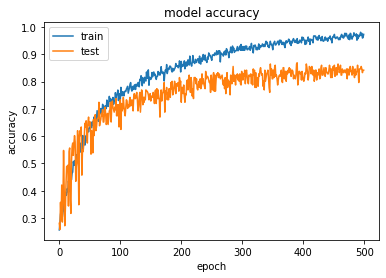

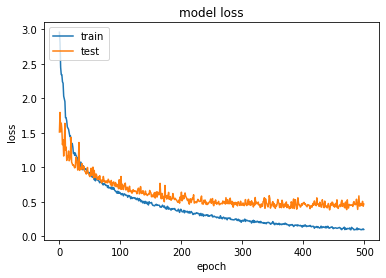

In [72]:
# Summarize the history for accuracy of the model during training  & test
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize the history for loss of the model during training  & test
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
# Evaluate the accuracy & loss of the trained model 
score = model.evaluate(x_testCNN, y_test)

# Print the result of loss in %
print("loss: {:5.2f}%".format(100*score[0]))

# Print the result of accuracy in %
print("accuracy: {:5.2f}%".format(100*score[1]))

7/7 [==============================] - 0s 23ms/step - loss: 0.4685 - accuracy: 0.8416
loss: 46.85%
accuracy: 84.16%


In [81]:
emotion = ['happy','sad','angry','fear']

In [75]:
# Function used to predict the emotion after the training 

def predict_result(audio_file):

  # extract features and reshape it
  characteristics = np.array(extract_characteristics(audio_file, mfcc=True, chroma=True, mel=True).reshape(1, -1))

  # predict
  f = np.expand_dims(characteristics,axis=2)
  model_predictions = model.predict(f)
  model_prediction_classes = np.argmax(model_predictions)

  result = model_prediction_classes

  # Return the predicted result !
  return result 

In [98]:
# Load and listen to a sample audio file

audio_file = audio_dir + '/Actor_13/03-02-05-02-02-02-13.wav'
audio, sample_rate = librosa.load(audio_file)

ipd.Audio(audio, rate=sample_rate)

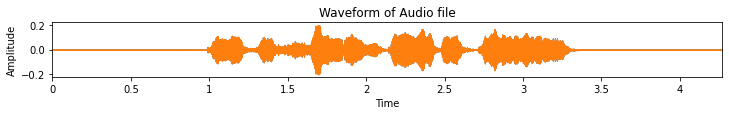

In [99]:
# Plot the audio file's waveform

plt.figure(figsize=(12,1))
librosa.display.waveplot(audio, sample_rate)
plt.title('Waveform of Audio file')
plt.ylabel('Amplitude')

_ = librosa.display.waveplot(audio)

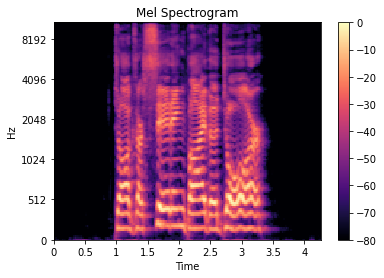

In [78]:
# Plot the mel spectrogram of the audio file

mel_spec = librosa.feature.melspectrogram(audio, sr=sample_rate)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram');

In [100]:
# Print the predicted result !

result = predict_result(audio_file)
print(result)
print("result :", emotion[result])

2
result : angry


In [94]:
# Load and listen to a sample audio file

audio_file = audio_dir + '/Actor_09/03-02-04-02-02-02-09.wav'
audio, sample_rate = librosa.load(audio_file)

ipd.Audio(audio, rate=sample_rate)

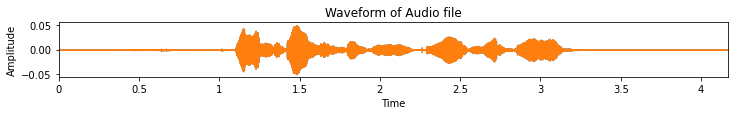

In [95]:
# Plot the audio file's waveform

plt.figure(figsize=(12,1))
librosa.display.waveplot(audio, sample_rate)
plt.title('Waveform of Audio file')
plt.ylabel('Amplitude')

_ = librosa.display.waveplot(audio)

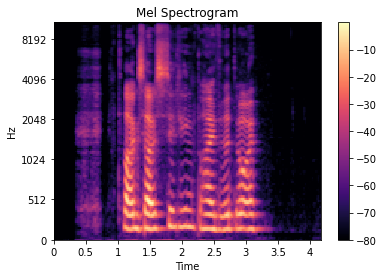

In [85]:
# Plot the mel spectrogram of the audio file

mel_spec = librosa.feature.melspectrogram(audio, sr=sample_rate)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram');

In [88]:
# Print the predicted result !

result = predict_result(audio_file)
print(result)
print("result :", emotion[result])

1
result : sad
